In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from matplotlib import rc
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size' : 18})
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
# import matplotlib.patches as patches
# from matplotlib.colors import to_rgba

In [2]:
from time import time
def runtime(t0):
    dt = time() - t0
    if dt < 60:
        message = f'{dt:.0f} sec.'
    elif dt < 3600:
        message = f'{dt/60:.0f} min.'
    else:
        h = int(dt//3600)
        m = int((dt%3600) / 60)
        message = f'{h} h. {m} min.'
    print(message)
    
def dround(x, dec=2):
    x += 1e-9
    return float(f'{x:.{dec}f}')

# Beirut explosion

$ \frac{5}{2} \, \log R = \frac{5}{2} \, \log\left(S \sqrt[5]{\frac{E}{\rho}}\right) + \log t$

In [23]:
def get_video_frames(path):
    # create a folder to store extracted images
    folder_path = '/'.join(path.split('/')[:-1])
    title = path.split('/')[-1].split('.')[0]
    import os
    folder_to = f'{folder_path}/video_frames/{title}'
    os.mkdir(folder_to)
    # use opencv to do the job
    import cv2
    vidcap = cv2.VideoCapture(path)
    cnt, ts = 0, 0
    timestamps = [vidcap.get(cv2.CAP_PROP_POS_MSEC)]
    timestamp_file = open(f'{folder_to}/timestamps.txt', 'w')
    while True:
        success,image = vidcap.read()
#         timestamps.append(ts)
        # save timestamps into txt file
        timestamp_file.write(f'{cnt} \t {ts}')
        timestamp_file.write('\n')
        if not success:
            break
        cv2.imwrite(os.path.join(folder_to, f'frame{cnt}_{ts}.jpg'), image)  # save frame as JPEG file
        ts = dround(vidcap.get(cv2.CAP_PROP_POS_MSEC) / 1000, dec=3)
        cnt += 1
    print(f'{cnt} video frames extacted to {folder_to}')
    fps = vidcap.get(cv2.CAP_PROP_FPS)
    print(f'FPS = {fps}')
    # close video file
    vidcap.release()
    # closeoutput file
    timestamp_file.close()

In [24]:
get_video_frames('data/Beirut-Explosion/Beirut-Explosion-south.mp4')

1101 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-south
FPS = 29.979577944179713


In [25]:
get_video_frames('data/Beirut-Explosion/Beirut-Explosion-east.mp4')
# 2192 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-east
# FPS = 29.97002997002997

2192 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-east
FPS = 29.97002997002997


In [22]:
# get_video_frames('data/Beirut-Explosion/Beirut-Explosion-west.mp4')
# # 1556 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-west
# # FPS = 25.0

In [53]:
get_video_frames('data/Beirut-Explosion/Beirut-Explosion-close.mp4')

523 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-close
FPS = 57.262773722627735


In [212]:
# get_video_frames('data/Beirut-Explosion/Beirut-Explosion-east-HD.mp4')
get_video_frames('data/Beirut-Explosion/Beirut-Explosion-east-4k.mp4')

225 video frames extacted to data/Beirut-Explosion/video_frames/Beirut-Explosion-east-4k
FPS = 30.0


0.03333333333333333

In [244]:
# video from south
df2 = pd.DataFrame()
df2['D'] = [222, 286, 326, 368, 403]
df2['R'] = df2['D'] /2 * 58.6/75
df2['t'] = [11.208, 11.241, 11.274, 11.308, 11.341]
df2['t'] -= 11.174
df2['5/2*log10_R'] = np.log10(df2['R'] ) * 5/2
df2['log10_t'] = np.log10(df2['t']) 

# video from east 4k
df3 = pd.DataFrame()
df3['D'] = [218, 304, 388, 456, 518, 557, 609]
df3['R'] = df3['D'] /2 * 54.7/105
df3['t'] = [3.400, 3.433, 3.467, 3.533, 3.600, 3.633, 3.667]
df3['t'] -= 3.367  # <- substract t=0
df3['t'] /= 2  # footage was slowed down x2
df3['5/2*log10_R'] = np.log10(df3['R'] ) * 5/2
df3['log10_t'] = np.log10(df3['t']) 

# video from too close
df4 = pd.DataFrame()
df4['D'] = [150, 197, 224, 263, 272, 294, 315, 332, 342, 350]
df4['R'] = df4['D'] /2 * 62/ 69
df4['t'] = [7.282, 7.300, 7.317, 7.335, 7.352, 7.370, 7.387, 7.404, 7.422, 7.439]
df4['t'] -= 7.265  # <- substract t=0
df4['5/2*log10_R'] = np.log10(df4['R'] ) * 5/2
df4['log10_t'] = np.log10(df4['t']) 

In [245]:
np.sqrt(438**2 + 278**2)

518.7754813018827

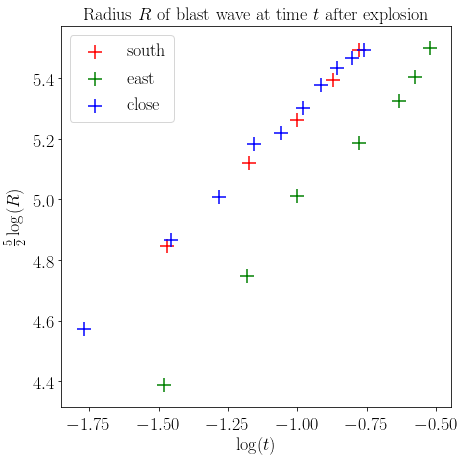

In [246]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.1, -1
ymin, ymax = 7.5, 11
ax.set_title(r'Radius $R$ of blast wave at time $t$ after explosion', fontsize=18)
# ax.scatter(dfb['log10_t'], dfb['5/2*log10_R'], s=180, marker='+', color='r', label='Tw')
ax.scatter(df2['log10_t'], df2['5/2*log10_R'], s=180, marker='+', color='r', label='south')
ax.scatter(df3['log10_t'], df3['5/2*log10_R'], s=180, marker='+', color='g', label='east')
ax.scatter(df4['log10_t'], df4['5/2*log10_R'], s=180, marker='+', color='b', label='close')
ax.set_xlabel(r'$\log(t)$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R)$', fontsize=18)
ax.legend()
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18);
# fig.savefig('plots/BlastWaveRadius.pdf', bbox_inches='tight')

(5,) (5, 1)
R^2 = 1.00


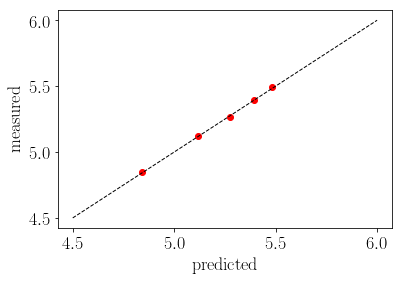

In [37]:
X2 = df2['log10_t'].values.reshape(1, -1).T
y2 = df2['5/2*log10_R'].values
print(y2.shape, X2.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model2 = LinearRegression()
model2.fit(X2, y2)
yhat2 = model2.predict(X2)

print(f'R^2 = {r2_score(yhat2, y2):.2f}')
plt.scatter(yhat2, y2, color='r')
line2 = np.linspace(4.5, 6)
plt.xlabel('predicted')
plt.ylabel('measured')
plt.plot(line2, line2, 'k--', linewidth=1);

In [38]:
model2.intercept_, model2.coef_[0]

(6.204299498294102, 0.9269869560614529)

c:\users\jsdiaz\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


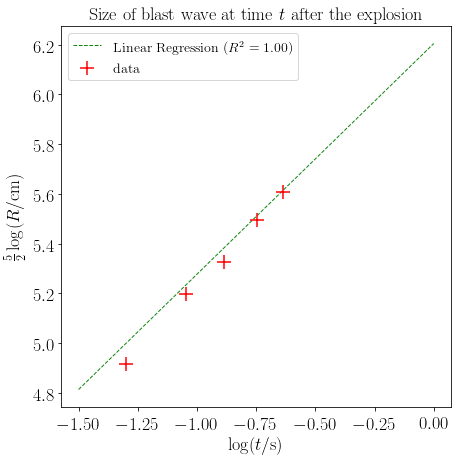

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -4.5, 0
ymin, ymax = 7.3, 12
ax.set_title(r'Size of blast wave at time $t$ after the explosion', fontsize=18)
ax.scatter(dfb['log10_t'], dfb['5/2*log10_R'], s=180, marker='+', color='r', label='data', zorder=10)
logt2 = np.linspace(-1.5, 0, 2)
# ax.plot(logt, logt + 11.915, 'b--', label='G.I. Taylor (1950)', linewidth=1, zorder=1, alpha=0.95)
ax.plot(logt2, model2.intercept_ + model2.coef_[0] * logt2, 'g--', linewidth=1, 
        label=f'Linear Regression ($R^2 = {r2_score(yhat2, y2):.2f}$)', zorder=0, alpha=0.95)
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t/\mathrm{s})$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R/\mathrm{cm})$', fontsize=18)
# ax.set_xticklabels(x_ticks, rotation=0, fontsize=15)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=15)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.legend(fontsize=14);
# fig.savefig('plots/BlastWaveSize.pdf', bbox_inches='tight')

In [40]:
from scipy.optimize import fsolve
def loss(i, slope=1):
    """Fixed slope 1-deg polynomial residuals"""
    return ((y2 - (slope*X2 + i))**2).sum()

In [41]:
np.polyfit(df2['log10_t'].values, y2, 1)

array([0.92698696, 6.2042995 ])

In [42]:
intercept = fsolve(loss, x0=1)[0]
intercept

c:\users\jsdiaz\anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


6.281468821613544

In [43]:
r2_beirut = r2_score(X2 + intercept, y2)
r2_beirut

0.9935814871659602

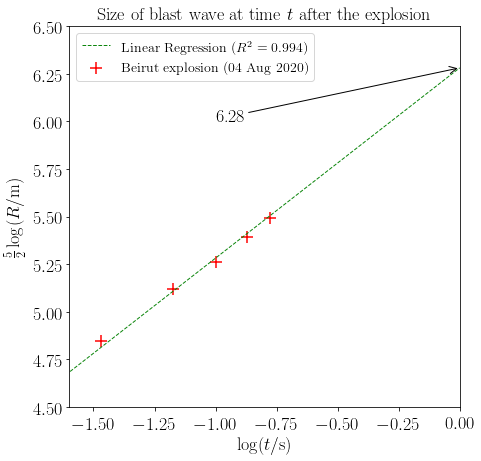

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
xmin, xmax = -1.6, 0
ymin, ymax = 4.5, 6.5 #9.5, 11.5
ax.set_title(r'Size of blast wave at time $t$ after the explosion', fontsize=18)
# Beirut
# ax.scatter(dfb['log10_t'], dfb['5/2*log10_R'], s=150, marker='+', color='r', label='Beirut explosion (04 Aug 2020)', zorder=0)
ax.scatter(df2['log10_t'], df2['5/2*log10_R'], s=150, marker='+', color='r', label='Beirut explosion (04 Aug 2020)', zorder=0)
logt2 = np.linspace(-5, 0, 2)
ax.plot(logt2, intercept + logt2, 'g--', linewidth=1, 
        label=f'Linear Regression ($R^2 = {r2_beirut:.3f}$)', zorder=1, alpha=0.95)

ax.annotate(f'{intercept:.2f}', xy=(0, intercept), xytext=(-1, 6), arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel(r'$\log(t/\mathrm{s})$', fontsize=18)
ax.set_ylabel(r'$\frac{5}{2}\log(R/\mathrm{m})$', fontsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.legend(fontsize=14, loc='upper left');
# fig.savefig('plots/BlastWaveSize_Beirut.pdf', bbox_inches='tight')

In [45]:
# joules to kt of TNT
j2kt = 1/4.18e12

In [46]:
E_J = 10**(intercept * 2/5 * 5) * 1.25 * 0.856 
print(f'energy = {E_J:.2e} J')

energy = 3.91e+12 J


In [47]:
print(f'energy = {E_J* j2kt:.3f} kt')

energy = 0.936 kt


ammnium nitrate explosive heat: 1447.7 J/g (Review on Thermal Decomposition of Ammonium Nitrate,  Journal of Energetic Materials, Volume 31, pp. 1-26, 2013)

In [48]:
print(f'energy = {1447.7/1e-3 * 2750e3 * 1/4.18e12:.3f}')

energy = 0.952
